In [3]:
# examine length bias patterns in diff coverages and length bins

In [1]:
from utility import *

cov = 'cov2'
diffs = []
diffs_pos = []
diffs_neg = []

for l in [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]:
    print(f'###### length: {l} #########')
    diff, diff_pos, diff_neg = lengthDiffOneBatch(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim4errModel/calledIBD_1240k/{cov}/ch3_{round(l, 1)}cm/ch3.tsv', \
        f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim4errModel/simGeno/ch3_{round(l, 1)}cm/ibd_info.csv')
    diffs.extend(diff)
    diffs_pos.extend(diff_pos)
    diffs_neg.extend(diff_neg)

###### length: 5.0 #########
true segment: (2.0602756275742604, 2.1102756275742602), inferred segment: 2.025412082672119 - 2.130470991134644
###### length: 5.5 #########
true segment: (2.0494916494877837, 2.104491649487784), inferred segment: 2.044719 - 2.176884889602661
true segment: (2.0784394470408674, 2.1334394470408675), inferred segment: 2.0295228958129883 - 2.140557050704956
true segment: (1.9664758296746463, 2.0214758296746465), inferred segment: 1.9536739587783811 - 2.07344388961792
true segment: (2.0858355494545324, 2.1408355494545326), inferred segment: 2.026741981506348 - 2.140618085861206
###### length: 6.0 #########
###### length: 6.5 #########
true segment: (1.8518151450114329, 1.9168151450114328), inferred segment: 1.792801022529602 - 1.920593023300171
###### length: 7.0 #########
true segment: (2.016655571674348, 2.086655571674348), inferred segment: 1.97223699092865 - 2.1006319522857666
###### length: 7.5 #########
true segment: (1.613735542913523, 1.688735542913523),

proportion of overshoot: 0.8224423699752333
mean of overshoot: 0.7800591212245306
mean of undershoot: 0.15132530420796106


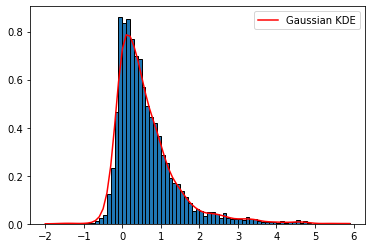

In [2]:
import matplotlib.pyplot as plt

prop = len(diffs_pos)/len(diffs)
mu_pos = np.mean(diffs_pos)
mu_neg = np.mean(np.abs(diffs_neg))
print(f'proportion of overshoot: {prop}')
print(f'mean of overshoot: {mu_pos}')
print(f'mean of undershoot: {mu_neg}')

bins = np.arange(-2, 6, 0.1)
plt.hist(diffs, ec='k', bins=bins, density=True)

from scipy import stats
import pickle

k = stats.gaussian_kde(diffs)
plt.plot(bins, k.evaluate(bins), color='red', label='Gaussian KDE')
pickle.dump(k, open(f'lengthBias.{cov}.kde', 'wb'))

plt.legend(loc='upper right')
plt.savefig(f'lengthBias.{cov}.png', dpi=300)


# now construct the length bias matrix from the fitted KDE object

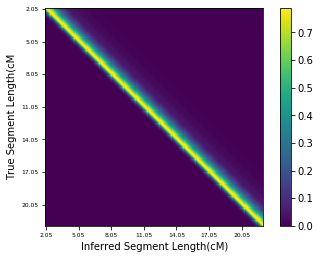

In [3]:
import numpy as np
import pickle

kde = pickle.load(open(f'lengthBias.{cov}.kde', 'rb'))

minL = 2
maxL = 22
step = 0.1

bins_calc = np.arange(minL, maxL+step, step)
binMidpoint_calc = (bins_calc[1:] + bins_calc[:-1])/2
nBins = len(binMidpoint_calc)
lengthDiff = binMidpoint_calc.reshape(1, nBins) - binMidpoint_calc.reshape(nBins, 1)

nrow, ncol = lengthDiff.shape
R = np.zeros_like(lengthDiff)
for i in range(nrow):
    for j in range(ncol):
        R[i,j] = kde.evaluate(lengthDiff[i,j])

xticks = [i for i in np.arange(0, len(binMidpoint_calc), 30)]
yticks = [i for i in np.arange(0, len(binMidpoint_calc), 30)]
xticklabels = [round(binMidpoint_calc[i],3) for i in xticks]
yticklabels = [round(binMidpoint_calc[j],3) for j in yticks]
plt.imshow(R, cmap='viridis', aspect='equal')
plt.colorbar()
plt.xticks(xticks, xticklabels, fontsize=6)
plt.yticks(yticks, yticklabels, fontsize=6)
plt.xlabel('Inferred Segment Length(cM)')
plt.ylabel('True Segment Length(cM')
plt.savefig('Rmat.png', dpi=300)
plt.savefig('Rmat.pdf', dpi=300)


# up to this point R represents density, not probability
# to use as input to the inference function, we need to convert it to probability
R = step*R
np.save(open(f'R.{cov}.npy', 'wb'), R)


In [4]:
kde.integrate_box_1d(-2, 4)

0.9913674406940498

# figures for the manuscript

percentage of overshoot: 0.8
mean of overshoot: 0.5578277514872559
mean of undershoot: -0.1275421675529469
percentage of overshoot: 0.808
mean of overshoot: 0.558124093186503
mean of undershoot: -0.11473335775832512
percentage of overshoot: 0.792
mean of overshoot: 0.6092379126264612
mean of undershoot: -0.15582423291297734


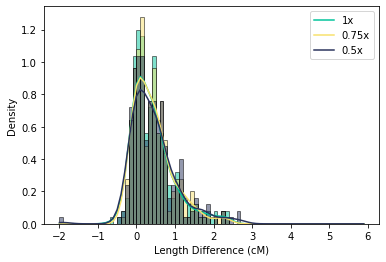

In [20]:
from scipy import stats

bins = np.arange(-2, 6, 0.1)
cov2label={'cov1':'1x', 'cov3over4':'0.75x', 'cov1over2':'0.5x'}
colors = {'#29335c', '#00c49a', '#f8e16c'}

for cov, color in zip(['cov1', 'cov3over4', 'cov1over2'], colors):
    diffs = []
    diff, diff_pos, diff_neg = lengthDiffOneBatch(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim/calledIBD/{cov}/ch3_{round(l, 1)}cm/ibd.summary.csv', \
        f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim/simGeno/ch3_{round(l, 1)}cm/ibd_info.csv')
    diffs.extend(diff)

    plt.hist(diffs, ec='k', bins=bins, density=True, alpha=0.5, color=color)
    k = stats.gaussian_kde(diffs)
    plt.plot(bins, k.evaluate(bins), color=color, label=f'{cov2label[cov]}')

plt.legend(loc='upper right')
plt.xlabel('Length Difference (cM)')
plt.ylabel('Density')
plt.savefig('lengthBias.png', dpi=300)
plt.savefig('lengthBias.pdf')
    